<a href="https://colab.research.google.com/github/stephe-hu/datasci_3_eda/blob/main/hha507assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load in data

In [2]:
# Load in data
df = pd.read_csv("https://raw.githubusercontent.com/stephe-hu/datasci_3_eda/main/data/OMT_MDCD_R23_P11_V10_YTD21_GEO.csv")
df

,Year,Geo_Lvl,Geo_Cd,Geo_Desc,Plan_Type,Tot_Opioid_Clms,Tot_Clms,Opioid_Prscrbng_Rate,Opioid_Prscrbng_Rate_5Y_Chg,Opioid_Prscrbng_Rate_1Y_Chg,LA_Tot_Opioid_Clms,LA_Opioid_Prscrbng_Rate,LA_Opioid_Prscrbng_Rate_5Y_Chg,LA_Opioid_Prscrbng_Rate_1Y_Chg
0,2021,National,NaN,National,All,21654225.0,686625295.0,3.15,-2.23,-0.09,4672903.0,21.58,14.04,2.64
1,2021,National,NaN,National,FFS,5084859.0,180712324.0,2.81,-2.48,-0.15,736567.0,14.49,5.34,1.05
2,2021,National,NaN,National,MC,16569366.0,505912971.0,3.28,-2.14,-0.06,3936336.0,23.76,16.90,2.98
3,2021,State,1.0,Alabama,All,175237.0,7525456.0,2.33,-3.04,-0.38,7767.0,4.43,-0.36,-0.18
4,2021,State,1.0,Alabama,FFS,175237.0,7525456.0,2.33,-3.04,-0.38,7767.0,4.43,-0.36,-0.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1399,2013,State,55.0,Wisconsin,FFS,896650.0,10127535.0,8.85,NaN,NaN,119908.0,13.37,NaN,NaN
1400,2013,State,55.0,Wisconsin,MC,2350.0,28041.0,8.38,NaN,NaN,434.0,18.47,NaN,NaN
1401,2013,State,56.0,Wyoming,All,41202.0,529696.0,7.78,NaN,NaN,4230.0,10.27,NaN,NaN
1402,2013,State,56.0,Wyoming,FFS,41202.0,529696.0,7.78,NaN,NaN,4230.0,10.27,NaN,NaN


In [3]:
# Cleaning column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [4]:
# Look for missingness
df.isnull().sum()

year                                0
geo_lvl                             0
geo_cd                             27
geo_desc                            0
plan_type                           0
tot_opioid_clms                    18
tot_clms                            2
opioid_prscrbng_rate              132
opioid_prscrbng_rate_5y_chg       852
opioid_prscrbng_rate_1y_chg       285
la_tot_opioid_clms                 36
la_opioid_prscrbng_rate           156
la_opioid_prscrbng_rate_5y_chg    872
la_opioid_prscrbng_rate_1y_chg    311
dtype: int64

In [5]:
# Drop rows with any NaN values
df.dropna(inplace=True)

# Convert variables
convert_columns = ['year', 'geo_cd']
df[convert_columns] = df[convert_columns].astype(str)

# Statistical description
df.describe()

,tot_opioid_clms,tot_clms,opioid_prscrbng_rate,opioid_prscrbng_rate_5y_chg,opioid_prscrbng_rate_1y_chg,la_tot_opioid_clms,la_opioid_prscrbng_rate,la_opioid_prscrbng_rate_5y_chg,la_opioid_prscrbng_rate_1y_chg
count,5.170000e+02,5.170000e+02,517.000000,517.000000,517.000000,5.170000e+02,517.000000,517.000000,517.000000
mean,3.404899e+05,1.023787e+07,3.540909,-2.884932,-0.397369,5.289037e+04,11.495010,2.965338,0.644333
std,4.469131e+05,1.362817e+07,2.056353,2.233744,0.845825,2.182792e+05,14.956586,14.406476,5.532389
min,2.400000e+01,8.834000e+03,0.030000,-10.420000,-3.490000,0.000000e+00,0.000000,-14.260000,-12.330000
25%,4.520000e+04,1.594969e+06,2.440000,-3.910000,-0.710000,4.132000e+03,5.010000,-1.530000,-0.630000
50%,1.836080e+05,5.442272e+06,3.180000,-3.070000,-0.370000,1.220700e+04,7.960000,-0.290000,-0.250000
75%,4.995630e+05,1.392614e+07,4.160000,-2.250000,-0.160000,3.886300e+04,10.430000,1.110000,0.190000
max,3.320845e+06,8.796311e+07,17.780000,13.840000,7.020000,2.461048e+06,91.930000,84.250000,50.320000


In [6]:
# Export cleaned data as new file
df.to_csv('clean.csv')

# Univariate Analysis

## Opioid Prescribing Rate

In [7]:
# Calculate measures of central tendency
mean = df['opioid_prscrbng_rate'].mean()
median = df['opioid_prscrbng_rate'].median()
mode = df['opioid_prscrbng_rate'].mode().values[0]
print(f'Mean: {mean}')
print(f'Median: {median}')
print(f'Mode: {mode}')

Mean: 3.540909090909091
Median: 3.18
Mode: 2.87


In [8]:
# Calculate measures of spread
range = df['opioid_prscrbng_rate'].max() - df['opioid_prscrbng_rate'].min()
variance = df['opioid_prscrbng_rate'].var()
std_deviation = df['opioid_prscrbng_rate'].std()
iqr = df['opioid_prscrbng_rate'].quantile(0.75) - df['opioid_prscrbng_rate'].quantile(0.25)
print(f'Range: {range}')
print(f'Variance: {variance}')
print(f'Standard deviation: {std_deviation}')
print(f'IQR: {iqr}')

Range: 17.75
Variance: 4.228586187455955
Standard deviation: 2.0563526418044047
IQR: 1.7200000000000002


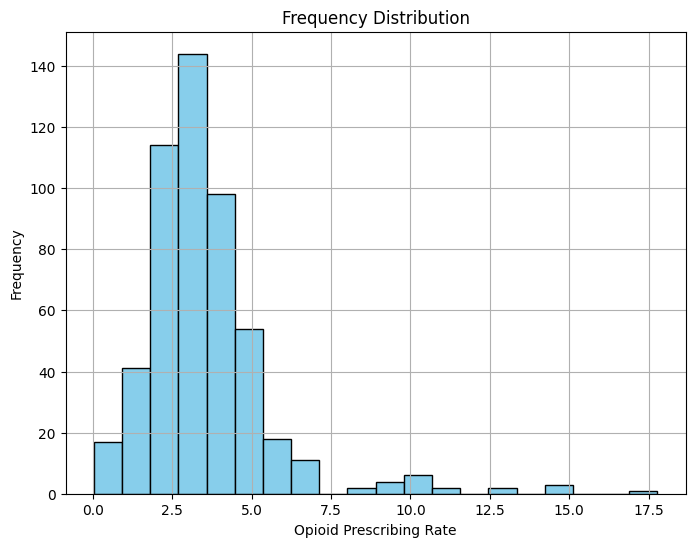

In [9]:
# Create a histogram
plt.figure(figsize=(8, 6))
plt.hist(df['opioid_prscrbng_rate'], bins=20, color='skyblue', edgecolor='black')
plt.title('Frequency Distribution')
plt.xlabel('Opioid Prescribing Rate')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


## Long-Acting Opioid Prescribing Rate


In [10]:
# Calculate measures of central tendency
mean = df['la_opioid_prscrbng_rate'].mean()
median = df['la_opioid_prscrbng_rate'].median()
mode = df['la_opioid_prscrbng_rate'].mode().values[0]
print(f'Mean: {mean}')
print(f'Median: {median}')
print(f'Mode: {mode}')

Mean: 11.495009671179885
Median: 7.96
Mode: 0.0


In [11]:
# Calculate measures of spread
range = df['la_opioid_prscrbng_rate'].max() - df['la_opioid_prscrbng_rate'].min()
variance = df['la_opioid_prscrbng_rate'].var()
std_deviation = df['la_opioid_prscrbng_rate'].std()
iqr = df['la_opioid_prscrbng_rate'].quantile(0.75) - df['la_opioid_prscrbng_rate'].quantile(0.25)
print(f'Variance: {variance}')
print(f'Standard deviation: {std_deviation}')
print(f'IQR: {iqr}')

Variance: 223.69946652122414
Standard deviation: 14.95658605836319
IQR: 5.42


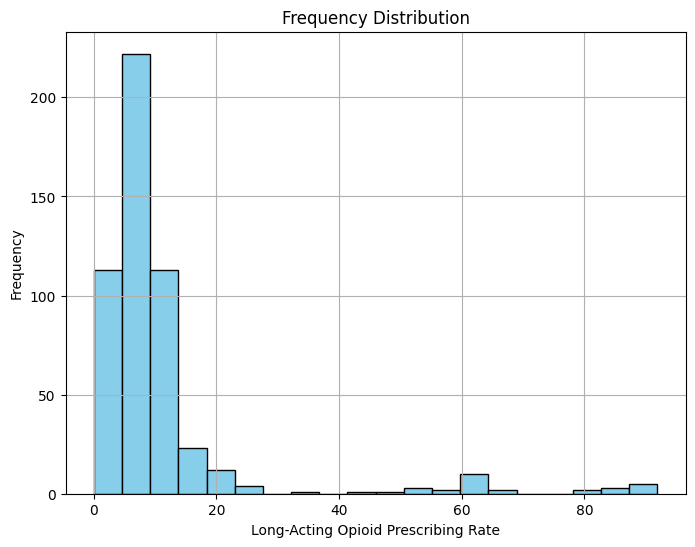

In [12]:
# Create a histogram
plt.figure(figsize=(8, 6))
plt.hist(df['la_opioid_prscrbng_rate'], bins=20, color='skyblue', edgecolor='black')
plt.title('Frequency Distribution')
plt.xlabel('Long-Acting Opioid Prescribing Rate')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Bivariate Analysis

## Opioid prescribing rate

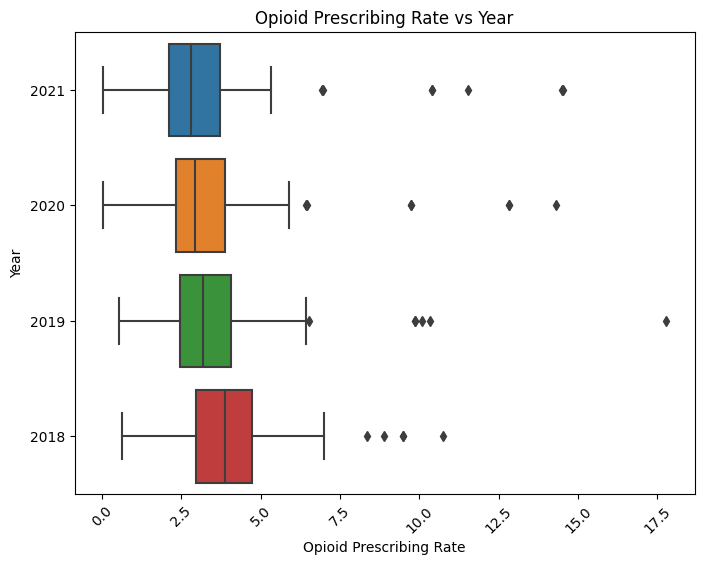

In [13]:
# Create a box plot for Opioid Prescribing Rate vs Year
plt.figure(figsize=(8, 6))
sns.boxplot(x='opioid_prscrbng_rate', y='year', data=df)
plt.title('Opioid Prescribing Rate vs Year')
plt.xlabel('Opioid Prescribing Rate')
plt.ylabel('Year')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()

<ipython-input-14-1154f0d4fb1c>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


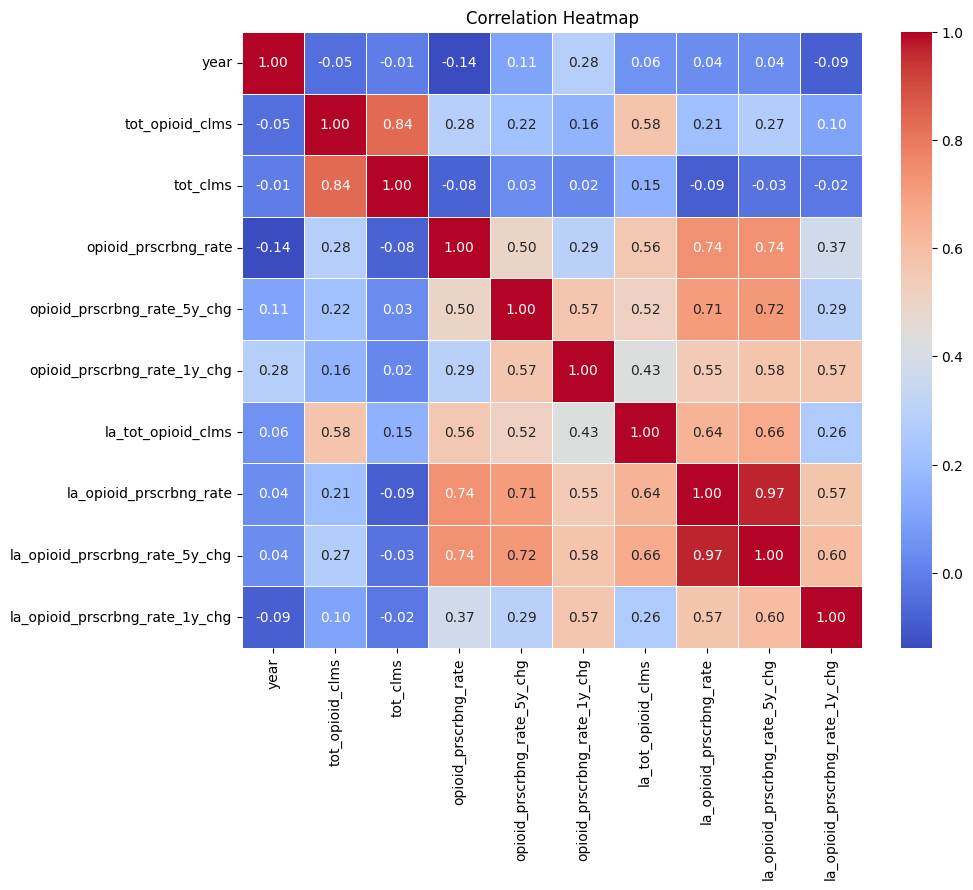

In [14]:
# Compute the correlation matrix
df['year'] = df['year'].astype(int)
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()



### The boxplot and heatmap demonstrate a weak negative correlation between year and opiod prescribing rate, where as the year increases, the opioid prescribing rate decreases.

# Handling Outliers

## Opioid prescribing rate

In [15]:
# Identify outliers using IQR
def identify_outliers(data, variable):
    Q1 = data[variable].quantile(0.25)
    Q3 = data[variable].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[variable] < lower_bound) | (data[variable] > upper_bound)]
    return outliers

# Identify outliers for opioid prescribing rate
outliers = identify_outliers(df, 'opioid_prscrbng_rate')
outlier_count = len(outliers)
print(f"Number of outliers: {outlier_count}")
print(outliers)


Number of outliers: 24
     year geo_lvl geo_cd    geo_desc plan_type  tot_opioid_clms    tot_clms  \
48   2021   State   19.0        Iowa       All         541375.0   7802164.0   
50   2021   State   19.0        Iowa        MC         535751.0   7681862.0   
81   2021   State   30.0     Montana       All         310163.0   2980056.0   
82   2021   State   30.0     Montana       FFS         310163.0   2980056.0   
141  2021   State   51.0    Virginia       All        2797499.0  19305772.0   
142  2021   State   51.0    Virginia       FFS          36579.0    317434.0   
143  2021   State   51.0    Virginia        MC        2760920.0  18988338.0   
237  2020   State   30.0     Montana       All         287494.0   2947481.0   
238  2020   State   30.0     Montana       FFS         287494.0   2947481.0   
297  2020   State   51.0    Virginia       All        2421644.0  18861371.0   
298  2020   State   51.0    Virginia       FFS          55723.0    389860.0   
299  2020   State   51.0    V

### 24 outliers are identified for the opioid prescribing rate. I decided to include these outliers because upon looking at the geographic description, most of the outliers are from Virginia and Montana. Therefore, I suggested conducting further analysis to understand the potential factors for the outliers in certain states.

# Automated Analysis

In [16]:
!pip install pandas-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.3/357.3 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 7.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 16.1 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=5b7724f66483cd090d452d757264fde6c0557c3a50998ee9300ba9cb4564565a
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [17]:
import pandas as pd
from pandas_profiling import ProfileReport

# Load your dataset
data = pd.read_csv('https://raw.githubusercontent.com/stephe-hu/datasci_3_eda/main/data/OMT_MDCD_R23_P11_V10_YTD21_GEO.csv')

# Generate the EDA report
report = ProfileReport(data)
report.to_file('eda_report.html')

<ipython-input-17-2e27a7f8e920>:2: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]